# Starter

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

root = "../input"

print(os.listdir(root))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


# Check Data

In [2]:
sample_df = pd.read_csv(os.path.join(root, 'sample_submission.csv'))
train_df = pd.read_csv(os.path.join(root, 'train.csv'))
test_df = pd.read_csv(os.path.join(root, 'test.csv'))

In [3]:
print("Train:", train_df.shape, "Test:", test_df.shape)
sample_df.head()

Train: (4459, 4993) Test: (49342, 4992)


,ID,target
0,000137c73,5.944923e+06
1,00021489f,5.944923e+06
2,0004d7953,5.944923e+06
3,00056a333,5.944923e+06
4,00056d8eb,5.944923e+06


# Clean Data
TBD

# Selected Features

In [4]:
# https://www.kaggle.com/johnfarrell/giba-s-property-extended-extended-result
ordered_cols = [
    'f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', '15ace8c9f', 
    'fb0f5dbfe', '58e056e12', '20aa07010', '024c577b9', 'd6bb78916', 'b43a7cfd5', 
    '58232a6fb', '1702b5bf0', '324921c7b', '62e59a501', '2ec5b290f', '241f0f867', 
    'fb49e4212', '66ace2992', 'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', 
    '1931ccfdd', '703885424', '70feb1494', '491b9ee45', '23310aa6f', 'e176a204a', 
    '6619d81fc', '1db387535', 'fc99f9426', '91f701ba2', '0572565c2', '190db8488', 
    'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98'
][::-1]

In [5]:
important_cols = ['20aa07010', '822e49b95', '64534cc93', '963a49cdc', 'ad207f7bb', 
                  'b30e932ba', '29c059dd2', '935ca66a9', '6d2ece683', 'ba136ae3f', 
                  'e078302ef', '861076e21', 'ce8ce671e', '0572565c2', '350473311', 
                  'ac30af84a', '6619d81fc', '1857fbccf', 'd47c58fe2', '3c8a3ced0', 
                  '6eef030c1', 'be2e15279', '6fa35fbba', '1c71183bb', '1f6b2bafa', 
                  '150dc0956', 'e4159c59e', 'f3cf9341c', '174edf08a', '1db387535', 
                  'ce3d7595b', '30b3daec2', 'b43a7cfd5', '482715cbd', '0df1d7b9a', 
                  '024c577b9', '4d2671746', '51707c671', 'aac52d8d9', 'ea772e115', 
                  'ad009c8b9', '341daa7d1', '53a550111', '197cb48af', 'dda820122', 
                  '2ec5b290f', '9306da53f', '44d5b820f', '32174174c', '8479174c2', 
                  '961b91fe7', '018ab6a80', '88d29cfaf', 'c671db79e', '277ef93fc', 
                  '7121c40ee', 'bf59c51c3', '0ff32eb98']

In [6]:
selected_features = ordered_cols

# Preprocess Data

In [7]:
# Get the target
test_ID = test_df['ID']
y = np.log1p(train_df.target)

train_df.drop(["ID", "target"], axis=1, inplace=True)
test_df.drop(["ID"], axis=1, inplace=True)

train_df.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [8]:
# logarithmic
train_df.loc[:, :] = np.log1p(train_df.values)
test_df.loc[:, :] = np.log1p(test_df.values)

train_df.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.603968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.508658,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Normalization

In [9]:
for feature in selected_features:
    m = np.mean(train_df[feature].values)
    s = np.std(train_df[feature].values)
    train_df[feature] = (train_df[feature] - m) / s
    test_df[feature] = (test_df[feature] - m) / s
    
train_df.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.699213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.413601,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.699213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.699213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.399812,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


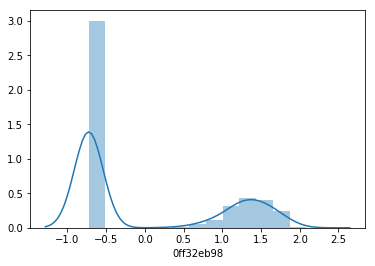

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train_df[ordered_cols[0]])
plt.show()

# MLP regression with Keras

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [12]:
val_fraction = 0.2

# Split into train & test
X_train, X_val, y_train, y_val = train_test_split(
    train_df[selected_features],
    y.values, 
    test_size=val_fraction,
    random_state=42,
    shuffle=True
)

# Loss function
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [17]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=len(selected_features), kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [18]:
m = larger_model()

In [19]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                533       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4991 entries, 48df886f9 to 9fc776466
dtypes: float64(4991)
memory usage: 169.8 MB
